In [1]:
import sys
import os
import yaml
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('../..'))
if module_path + "/src/simulations_v2" not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
    
from load_params import load_params
from analysis_helpers import get_cumulative_infection_cols

from multi_group_simulation import MultiGroupSimulation
from vax_sim_utils import load_vax_group_configs, create_multigrp_vax_sim

In [2]:
UG_vax_config = load_vax_group_configs(os.getcwd() + "/vax_sim_nominal_params/ug_greek_athlete_vax_config.yaml")

/home/aaj54/group-testing/src/simulations_v2/vax_sim_utils.py:28: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  vax_config = yaml.load(f)
/home/aaj54/group-testing/src/simulations_v2/load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
/home/aaj54/group-testing/src/simulations_v2/load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


In [3]:
sim = create_multigrp_vax_sim(UG_vax_config[0], UG_vax_config[1], UG_vax_config[2], 0.9, 0.3)

In [4]:
cum_inf_cols = get_cumulative_infection_cols(sim.run_new_trajectory(T=1)[1])

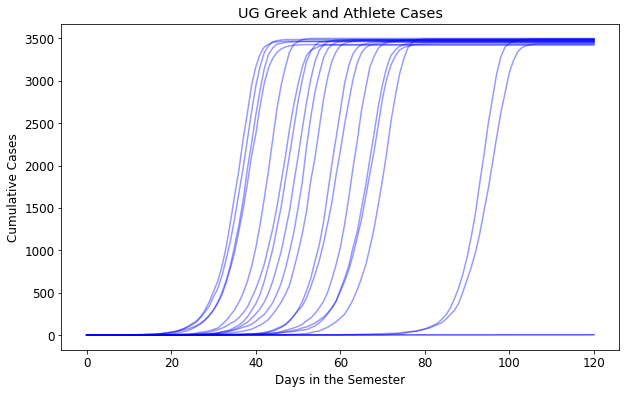

In [5]:
# Plotting trajectories
n_trajs = 20
plt.figure(figsize=(10,6))
for _ in range(n_trajs):
    plt.plot(sim.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1), alpha=0.4, color='blue')

plt.xlabel('Days in the Semester')
plt.ylabel('Cumulative Cases')
plt.title('UG Greek and Athlete Cases')
plt.show()